In [29]:
# naplnění matice spirálou čísel

import numpy as np
import matplotlib.pyplot as plt

def integer_spiral(n):
    # zde (aby mohl být kód trochu jednodušší) budeme trochu podvádět 
    # a uděláme matici o kousek větší (tedy nakonci nám zbyde nulový okraj)
    A = np.zeros((n + 2, n + 2))

    circles_around_center = int((n-1)/2)

    pos_row = int((n-1)/2 + 1)
    pos_col = int((n-1)/2 + 1)

    i = 1 # číslo, které se bude vkládat do matice

    # začneme ve středu, a jelikož je to trochu speciální případ, tak řešíme zvlášť
    A[pos_row, pos_col] = i
    i += 1
    pos_row += 1

    # kolik kruhů okolo středu musíme obkroužiz
    for circle_no in range(circles_around_center):
        # každý kruh má 4 strany, s délkou
        side_length = 2*circle_no + 2

        # čísla která se budou vkládat do matice
        numbers = np.linspace(i, i + side_length - 1, side_length)
        
        # dolní hrana
        A[pos_row, pos_col:(pos_col + side_length)] = numbers
        # upravíme pozici, aby se dalo pokračovat v další straně
        pos_col += side_length - 1
        pos_row -= 1
        
        # pravá hrana
        A[pos_row:(pos_row-side_length):-1, pos_col] = numbers + side_length
        # upravíme pozici, aby se dalo pokračovat v další straně
        pos_row -= side_length - 1
        pos_col -= 1
        
        # horní hrana
        A[pos_row, pos_col:(pos_col - side_length):-1] = numbers + 2*side_length
        # upravíme pozici, aby se dalo pokračovat v další straně
        pos_col -= side_length - 1
        pos_row += 1
        
        # levá hrana
        A[pos_row:(pos_row + side_length), pos_col] = numbers + 3*side_length
        # upravíme pozici, aby se dalo pokračovat v další straně
        pos_row += side_length
            
        # přičteme tolik, kolik čísel jsme vložili do matice    
        i += side_length * 4

    return A[1:-1, 1:-1] # ořízneme nulový okraj


In [ ]:
A = integer_spiral(7)
print(A)

[[43. 42. 41. 40. 39. 38. 37.]
 [44. 21. 20. 19. 18. 17. 36.]
 [45. 22.  7.  6.  5. 16. 35.]
 [46. 23.  8.  1.  4. 15. 34.]
 [47. 24.  9.  2.  3. 14. 33.]
 [48. 25. 10. 11. 12. 13. 32.]
 [49. 26. 27. 28. 29. 30. 31.]]


A čas na pěkné obrázky :-)

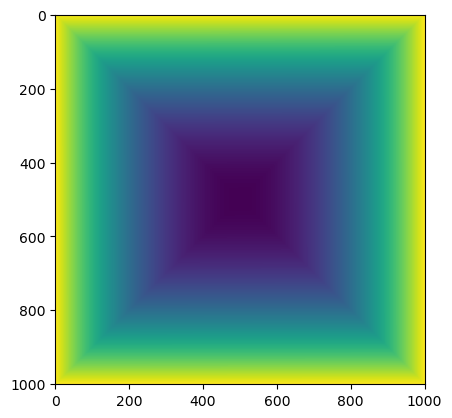

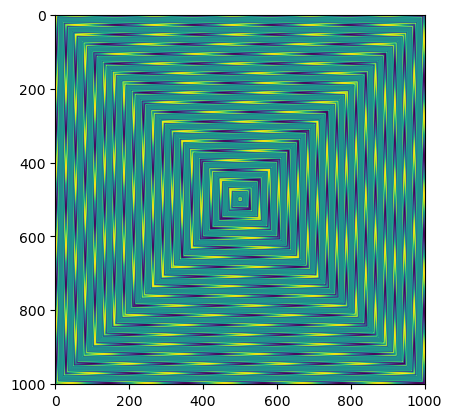

In [ ]:
A = integer_spiral(1001)
plt.imshow(A)
# new figure
plt.figure()
plt.imshow(np.sin(A*0.03))

In [31]:
# naplnění matice spirálou čísel

import numpy as np
import matplotlib.pyplot as plt


def integer_spiral2(n):
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [28]:
%timeit A = integer_spiral(7)
print(A)

47.4 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
[[43. 42. 41. 40. 39. 38. 37.]
 [44. 21. 20. 19. 18. 17. 36.]
 [45. 22.  7.  6.  5. 16. 35.]
 [46. 23.  8.  1.  4. 15. 34.]
 [47. 24.  9.  2.  3. 14. 33.]
 [48. 25. 10. 11. 12. 13. 32.]
 [49. 26. 27. 28. 29. 30. 31.]]


In [127]:
n = np.array((np.logspace(0.5, 3, 20)//2)*2 + 1, dtype=int)
time1 = np.zeros(n.size)
time2 = np.zeros(n.size)

for i,nn in enumerate(n):
     if nn < 20:
          tt =  %timeit -n10 -r300 -q -o A = integer_spiral(nn)
          time1[i] = tt.best
          tt = %timeit -n10 -r300 -q -o A = integer_spiral2(nn)
          time2[i] = tt.best
     elif nn < 100:
         tt = %timeit -n1 -r30 -q -o A = integer_spiral(nn)
         time1[i] = tt.best
         tt = %timeit -n1 -r30 -q -o A = integer_spiral2(nn)
         time2[i] = tt.best
     else:
         tt = %timeit -n2 -r3 -q -o A = integer_spiral(nn)
         time1[i] = tt.best
         tt = %timeit -n2 -r3 -q -o A = integer_spiral2(nn)
         time2[i] = tt.best
     print(f"{nn = }, {time1[i] = }, {time2[i] = }")


nn = 3, time1[i] = 2.3762101773172616e-05, time2[i] = 1.0277098044753075e-05
nn = 5, time1[i] = 4.047870170325041e-05, time2[i] = 2.6545202126726507e-05
nn = 5, time1[i] = 4.458949551917612e-05, time2[i] = 2.644999767653644e-05
nn = 7, time1[i] = 6.502390024252236e-05, time2[i] = 4.919239436276257e-05
nn = 11, time1[i] = 9.631749708205462e-05, time2[i] = 0.00011976929963566362
nn = 15, time1[i] = 0.00013336780248209834, time2[i] = 0.00022112600272521376
nn = 19, time1[i] = 0.00016598569927737117, time2[i] = 0.00035293520195409653
nn = 27, time1[i] = 0.0002478010137565434, time2[i] = 0.0007151599857024848
nn = 35, time1[i] = 0.0003204640233889222, time2[i] = 0.0012059190194122493
nn = 49, time1[i] = 0.0004541040398180485, time2[i] = 0.002412687987089157
nn = 65, time1[i] = 0.0006107150111347437, time2[i] = 0.004300152009818703
nn = 89, time1[i] = 0.000857161998283118, time2[i] = 0.008048279967624694
nn = 119, time1[i] = 0.0015208194963634014, time2[i] = 0.014689808507682756
nn = 163, ti

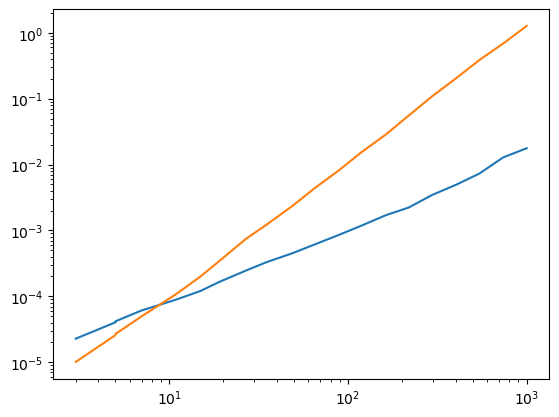

In [126]:
plt.plot(n, time1)
plt.plot(n, time2)
# set y scale to logarithmic
plt.yscale('log')
plt.xscale('log')
plt.show()

In [134]:



print("Coefficients: ", p)


Coefficients:  [  1.11042619 -11.92402086]


time1 má exponent 1.110426187765268
time2 má exponent 2.041028657535971


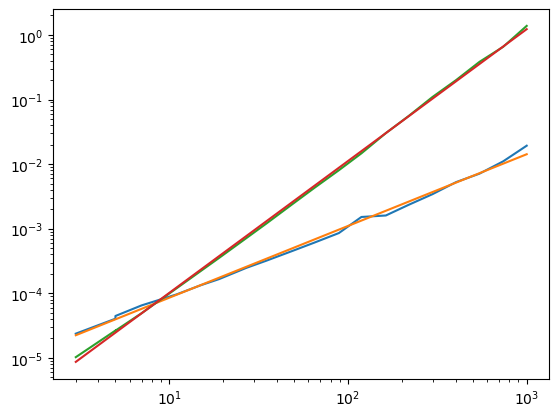

In [137]:
plt.plot(n, time1)
p = np.polyfit(np.log(n), np.log(time1), deg=1)
print(f"time1 má exponent {p[0]}")
plt.plot(n, np.exp(p[1])*n**p[0])
plt.plot(n, time2)
p = np.polyfit(np.log(n), np.log(time2), deg=1)
print(f"time2 má exponent {p[0]}")
plt.plot(n, np.exp(p[1])*n**p[0])

# set y scale to logarithmic
plt.yscale('log')
plt.xscale('log')
plt.show()



In [113]:
import numpy as np
from scipy.optimize import curve_fit


def non_neg_poly(x, *coeffs):
    return np.polyval(coeffs, x)


x = n
y = time2

popt, pcov = curve_fit(non_neg_poly, x, y, p0=[1, 1, 1, 1, 1], bounds=(0, np.inf))

print("Coefficients: ", popt)


Coefficients:  [4.04892617e-19 2.30233278e-20 1.70793790e-06 1.09785512e-04
 3.37051628e-10]


In [138]:
np.sqrt(289**2 + 296**2)


413.6870798079147

In [3]:
G3 = 1519.81
H3 = 1519.81

V = 0.00333334 * (17 * H3 + 300 * G3) - (0.00129637 * (-289 * (H3**2) - 10200 * H3 * G3))/(289 * (H3**3) + 15300 * (H3**2) * G3 + 135000 * H3 * (G3**2) + 5196.15 * (17 * (H3**3) * (G3**3) + 675 * (H3**2) * (G3**4))**(1/2))**(1/3) + 0.00857094 * (289 * (H3**3) + 15300 * (H3**2) * G3 + 135000 * H3 * (G3**2) + 5196.15 * (17 * (H3**3) * (G3**3) + 675 * (H3**2) * (G3**4))**(1/2))**(1/3)
I = (V-G3)/H3 * ((V-G3)/V)**2
I

0.1700009084682923